In [1]:
# Mountng Google Drive to import data
#from google.colab import drive
#drive.mount('/content/drive')

# Project Overview:

In this project, we analyze a dataset of car features to predict their market price using Linear Regression. This was built as part of the Innomatics Research Labs ML Workshop.

In [2]:
# importing dataset
import pandas as pd
import os
file_path = 'car_data.csv'
if os.path.exists(file_path):
    car_data = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
else:
    print(f"Error: {file_path} not found. Please ensure the CSV is in the same folder.")

Dataset loaded successfully!


In [3]:
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


## Data Cleaning:

Handling missing values, removing duplicates, and converting currency columns (MSRP) to numeric types.

In [4]:
# To get data info, null counts, data type of columns
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non-null   

In [5]:
# Shape/dimension of data
car_data.shape

(1610, 17)

In [6]:
#checking redundant rows
car_data.duplicated().sum()

np.int64(0)

In [7]:
#counting null values percentage of each column
car_data.isnull().sum()/car_data.shape[0]*100

index                    0.000000
Make                     0.000000
Model                    0.000000
Year                     0.000000
Trim                     0.000000
MSRP                     0.000000
Invoice Price           34.285714
Used/New Price           0.000000
Body Size                0.000000
Body Style               0.000000
Cylinders               10.248447
Engine Aspiration        0.000000
Drivetrain               0.000000
Transmission             0.000000
Horsepower               0.310559
Torque                   1.677019
Highway Fuel Economy    26.335404
dtype: float64

In [8]:
# Dropping columns with too many null values
car_data = car_data.drop(['Invoice Price','Cylinders','Highway Fuel Economy'], axis=1)

In [9]:
# 4 rows of Horsepower colum
car_data['Horsepower'][:4]

0    697 hp @ 6000 rpm
1    201 hp @ 4800 rpm
2    201 hp @ 5000 rpm
3    201 hp @ 5000 rpm
Name: Horsepower, dtype: object

In [10]:
#slicing Horsepower number from horsepower
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)
car_data['Horsepower_No'].head()

0    697.0
1    201.0
2    201.0
3    201.0
4    201.0
Name: Horsepower_No, dtype: float64

In [11]:
car_data[car_data['Horsepower_No'].isnull()]

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
371,971,Ford,F-150 Lightning,2024,Flash,"$67,995","$67,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,972,Ford,F-150 Lightning,2024,Lariat,"$76,995","$76,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,973,Ford,F-150 Lightning,2024,Platinum,"$84,995","$84,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,974,Ford,F-150 Lightning,2024,Pro,"$54,995","$54,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,975,Ford,F-150 Lightning,2024,XLT,"$62,995","$62,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


In [12]:
car_data[car_data['Make']=='Ford']

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
258,858,Ford,Bronco,2024,Badlands,"$50,095","$50,095",Compact,Convertible SUV,Turbocharged,4WD,manual,300 hp @ 5700 rpm,325 ft-lbs. @ 3400 rpm,300.0
259,859,Ford,Bronco,2024,Badlands,"$51,385","$51,385",Midsize,Convertible SUV,Turbocharged,4WD,manual,300 hp @ 5700 rpm,325 ft-lbs. @ 3400 rpm,300.0
260,860,Ford,Bronco,2024,Big Bend,"$39,630","$39,630",Compact,Convertible SUV,Turbocharged,4WD,manual,300 hp @ 5700 rpm,325 ft-lbs. @ 3400 rpm,300.0
261,861,Ford,Bronco,2024,Big Bend,"$40,370","$40,370",Midsize,Convertible SUV,Turbocharged,4WD,manual,300 hp @ 5700 rpm,325 ft-lbs. @ 3400 rpm,300.0
262,862,Ford,Bronco,2024,Black Diamond,"$43,330","$43,330",Compact,Convertible SUV,Turbocharged,4WD,manual,300 hp @ 5700 rpm,325 ft-lbs. @ 3400 rpm,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,4940,Ford,Transit Passenger Van,2023,"350 XLT High Roof w/148"" WB","$58,405","$58,405",Large,Passenger Van,Naturally Aspirated,AWD,automatic,275 hp @ 6250 rpm,260 ft-lbs. @ 4000 rpm,275.0
1336,4941,Ford,Transit Passenger Van,2023,"350 XLT Low Roof w/148"" WB","$55,835","$55,835",Midsize,Passenger Van,Naturally Aspirated,AWD,automatic,275 hp @ 6250 rpm,260 ft-lbs. @ 4000 rpm,275.0
1337,4942,Ford,Transit Passenger Van,2023,"350 XLT Low Roof w/148"" WB","$51,140","$51,140",Midsize,Passenger Van,Naturally Aspirated,RWD,automatic,275 hp @ 6250 rpm,260 ft-lbs. @ 4000 rpm,275.0
1338,4943,Ford,Transit Passenger Van,2023,"350 XLT Medium Roof w/148"" WB","$52,265","$52,265",Large,Passenger Van,Naturally Aspirated,RWD,automatic,275 hp @ 6250 rpm,260 ft-lbs. @ 4000 rpm,275.0


In [13]:
mean_horsepower = car_data['Horsepower_No'][car_data['Make']=='Ford'].mean()
#fill null values with mean value
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_horsepower)
#drop the horsepowe
car_data.drop(['Horsepower'], axis=1, inplace = True)
car_data.columns


Index(['index', 'Make', 'Model', 'Year', 'Trim', 'MSRP', 'Used/New Price',
       'Body Size', 'Body Style', 'Engine Aspiration', 'Drivetrain',
       'Transmission', 'Torque', 'Horsepower_No'],
      dtype='object')

In [14]:
car_data.isnull().sum()

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Torque               27
Horsepower_No         0
dtype: int64

In [15]:
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Torque,Horsepower_No
0,0,Aston Martin,DBX707,2024,Base,"$242,000","$242,000",Large,SUV,Twin-Turbo,AWD,automatic,663 ft-lbs. @ 2750 rpm,697.0
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$35,800",Compact,Sedan,Turbocharged,FWD,automatic,221 ft-lbs. @ 4100 rpm,201.0
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$37,800",Compact,Sedan,Turbocharged,AWD,automatic,221 ft-lbs. @ 4000 rpm,201.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$41,400",Compact,Sedan,Turbocharged,AWD,automatic,221 ft-lbs. @ 4000 rpm,201.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$39,400",Compact,Sedan,Turbocharged,FWD,automatic,221 ft-lbs. @ 4100 rpm,201.0


In [16]:
car_data['Torque'][:4]

0    663 ft-lbs. @ 2750 rpm
1    221 ft-lbs. @ 4100 rpm
2    221 ft-lbs. @ 4000 rpm
3    221 ft-lbs. @ 4000 rpm
Name: Torque, dtype: object

In [17]:
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)
car_data['Torque_No'].head()

0    663.0
1    221.0
2    221.0
3    221.0
4    221.0
Name: Torque_No, dtype: float64

In [18]:
#check missing values
car_data[car_data['Torque_No'].isnull()]

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Torque,Horsepower_No,Torque_No
42,42,Audi,Q4 Sportback e-tron,2024,Premium w/55,"$58,200","$58,200",Midsize,SUV,Electric Motor,AWD,automatic,NaN,335.000000,NaN
44,44,Audi,Q4 Sportback e-tron,2024,Premium Plus w/55,"$62,900","$62,900",Midsize,SUV,Electric Motor,AWD,automatic,NaN,335.000000,NaN
46,46,Audi,Q4 Sportback e-tron,2024,Prestige w/55,"$65,200","$65,200",Midsize,SUV,Electric Motor,AWD,automatic,NaN,335.000000,NaN
49,49,Audi,Q4 e-tron,2024,Premium w/55,"$55,200","$55,200",Midsize,SUV,Electric Motor,AWD,automatic,NaN,335.000000,NaN
52,52,Audi,Q4 e-tron,2024,Premium Plus w/55,"$59,900","$59,900",Midsize,SUV,Electric Motor,AWD,automatic,NaN,335.000000,NaN
54,54,Audi,Q4 e-tron,2024,Prestige w/55,"$62,200","$62,200",Midsize,SUV,Electric Motor,AWD,automatic,NaN,335.000000,NaN
75,75,Audi,Q8 Sportback e-tron,2024,Premium Plus S line,"$82,200","$82,200",Midsize,SUV,Electric Motor,AWD,automatic,NaN,402.000000,NaN
76,76,Audi,Q8 Sportback e-tron,2024,Premium S line,"$77,800","$77,800",Midsize,SUV,Electric Motor,AWD,automatic,NaN,402.000000,NaN
77,77,Audi,Q8 Sportback e-tron,2024,Prestige S line,"$88,200","$88,200",Midsize,SUV,Electric Motor,AWD,automatic,NaN,402.000000,NaN
78,78,Audi,Q8 e-tron,2024,Premium,"$74,400","$74,400",Midsize,SUV,Electric Motor,AWD,automatic,NaN,402.000000,NaN


In [19]:
mean_torque =  car_data['Torque_No'].mean()
car_data['Torque_No']= car_data['Torque_No'].fillna(mean_torque)
car_data.drop(['Torque'], axis=1, inplace = True)

In [20]:
car_data.isnull().sum() #rechecking

index                0
Make                 0
Model                0
Year                 0
Trim                 0
MSRP                 0
Used/New Price       0
Body Size            0
Body Style           0
Engine Aspiration    0
Drivetrain           0
Transmission         0
Horsepower_No        0
Torque_No            0
dtype: int64

In [21]:
car_data.dtypes

index                  int64
Make                  object
Model                 object
Year                   int64
Trim                  object
MSRP                  object
Used/New Price        object
Body Size             object
Body Style            object
Engine Aspiration     object
Drivetrain            object
Transmission          object
Horsepower_No        float64
Torque_No            float64
dtype: object

MSRP Price should be float and Used/new price should be float

In [22]:
car_data['MSRP'].head()

0    $242,000
1     $35,800
2     $37,800
3     $41,400
4     $39,400
Name: MSRP, dtype: object

In [23]:
car_data['MSRP']= car_data['MSRP'].str.replace('$','')
car_data['MSRP']= car_data['MSRP'].str.replace(',','')

In [24]:
car_data['MSRP']= car_data['MSRP'].astype(float)

In [25]:
car_data['MSRP'].head()

0    242000.0
1     35800.0
2     37800.0
3     41400.0
4     39400.0
Name: MSRP, dtype: float64

In [26]:
car_data['Used/New Price'].head()

0    $242,000
1     $35,800
2     $37,800
3     $41,400
4     $39,400
Name: Used/New Price, dtype: object

In [27]:
car_data['Used/New Price']= car_data['Used/New Price'].str.replace('$','')
car_data['Used/New Price']= car_data['Used/New Price'].str.replace(',','').astype(float)

In [28]:
new_car_data = car_data.drop(['index','Model','Year','Trim','Used/New Price'], axis = 1)
new_car_data.head()

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0


Exploratory Data Analysis (EDA):
"Visualizing the relationship between Horsepower, Torque, and Price."

<Axes: xlabel='Horsepower_No', ylabel='Torque_No'>

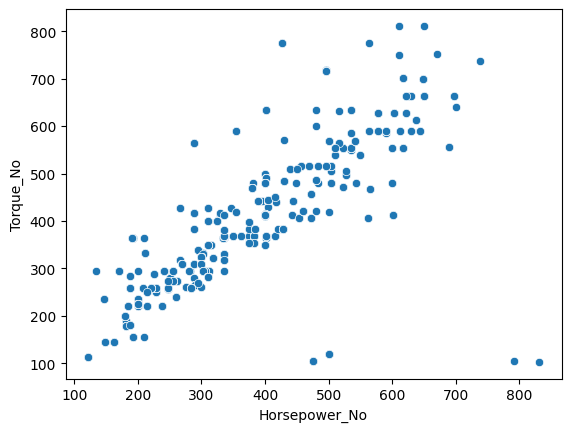

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data = new_car_data, x = 'Horsepower_No', y = 'Torque_No')

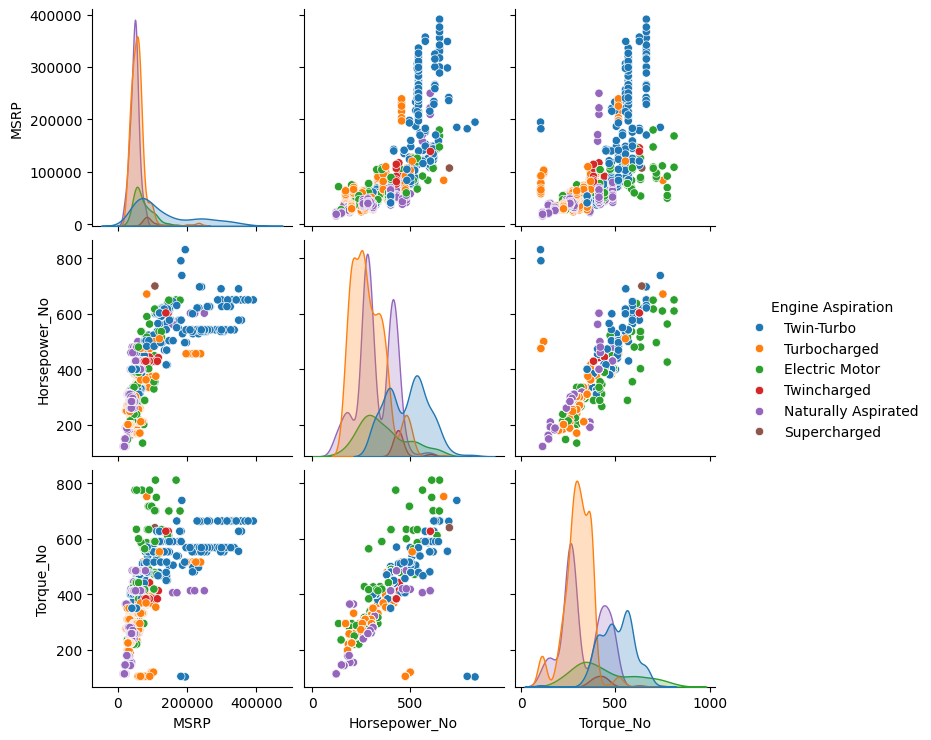

In [30]:
#sns.regplot(data = new_car_data, x = 'Horsepower_No', y = 'Torque_No')
sns.pairplot(data = new_car_data, hue = 'Engine Aspiration') # takes only numerical columns

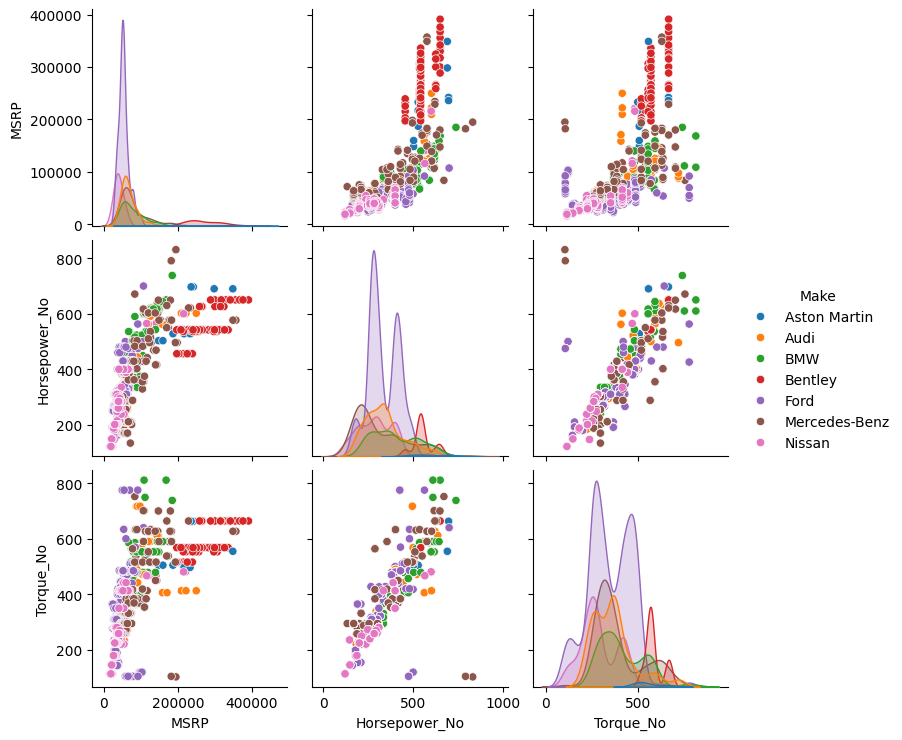

In [31]:
sns.pairplot(data = new_car_data, hue = 'Make')

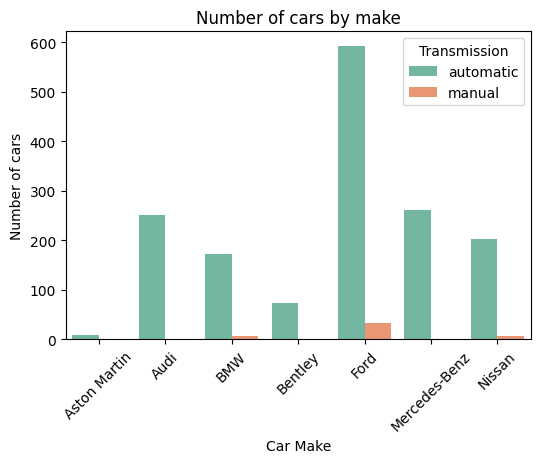

In [32]:
#count plot
plt.figure(figsize=(6,4))
sns.countplot(data = new_car_data, x = 'Make', hue = 'Transmission', palette ='Set2')
plt.title('Number of cars by make')
plt.xticks(rotation = 45)
plt.xlabel('Car Make')
plt.ylabel('Number of cars')
plt.show()

<Axes: >

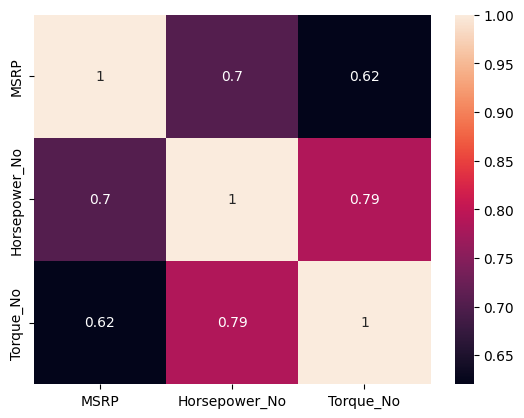

In [33]:
#heat map
num_var = ['MSRP','Horsepower_No', 'Torque_No']
sns.heatmap(new_car_data[num_var].corr(method = 'pearson'), annot = True)

In [34]:
new_car_data.shape

(1610, 9)

In [35]:
new_car_data.head()

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0


## Feature Engineering:

Encoding categorical variables (Make, Model) using One-Hot Encoding.

In [36]:
new_car_data = pd.get_dummies(new_car_data, columns = ['Make', 'Body Size', 'Body Style', 'Engine Aspiration', 'Drivetrain', 'Transmission'])
new_car_data.shape

(1610, 37)

In [37]:
new_car_data.head()

,MSRP,Horsepower_No,Torque_No,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Engine Aspiration_Supercharged,Engine Aspiration_Turbocharged,Engine Aspiration_Twin-Turbo,Engine Aspiration_Twincharged,Drivetrain_4WD,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD,Transmission_automatic,Transmission_manual
0,242000.0,697.0,663.0,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,True,False
1,35800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
2,37800.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,41400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,39400.0,201.0,221.0,False,True,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False


## Split data into features and target

In [38]:
X = new_car_data.drop(['MSRP'], axis = 1).values #input data
y = new_car_data['MSRP'].astype(int) #output/target data
print(X.shape)
print(y.shape)

(1610, 36)
(1610,)


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.80, random_state=15) #reproducable randomness
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1288, 36)
(322, 36)
(1288,)
(322,)


## Model Training:

Training a Linear Regression model using Scikit-Learn.

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_train)
all_df_predict = lm.predict(X)

## Evaluation:

Evaluating the model using R-squared and Mean Squared Error.

In [41]:
# model accuracy testing
from sklearn.metrics import r2_score
print('The Accuracy on the training data is: ', lm.score(X_train, y_train))
print('The Accuracy r2 on the training dataset prediction is: ', r2_score(y_train, y_pred))

The Accuracy on the training data is:  0.895779183244086
The Accuracy r2 on the training dataset prediction is:  0.895779183244086


In [42]:
#model accuracy on testing dataset
print('the accuracy on testing dataset is: ', lm.score(X_test, y_test))

the accuracy on testing dataset is:  0.9198625302493008


In [43]:
# RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
print('The RMSE on the training data is: ', sqrt(mean_squared_error(y_train, y_pred)))
print('The RMSE on the Testing dataset is: ', sqrt(mean_squared_error(y_test, lm.predict(X_test))))

The RMSE on the training data is:  17421.7784480966
The RMSE on the Testing dataset is:  16534.594571973663


## Storing our Model & Results

In [44]:
import pickle
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lm, f)

In [46]:
# Adding the predicted values
car_data['MSRP Predictions'] = all_df_predict

# Expoprting all the data with predictions
car_data.to_csv("data_with_pred.csv")

**Classification Model**

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=15, criterion  = 'entropy', max_depth = 10)
dt.fit(X,y)

C:\Users\Zaara\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")


,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,15
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
feature_importance_list = [] #initializing empty list
for i, column in enumerate(new_car_data.drop(['MSRP'], axis = 1)):
  print('importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
  fi = pd.DataFrame({'variable': [column], 'feature importance score': [dt.feature_importances_[i]]})
  feature_importance_list.append(fi)
final_fi = pd.concat(feature_importance_list, ignore_index=True)
final_fi = final_fi.sort_values('feature importance score', ascending = False).reset_index(drop=True)
final_fi

importance of feature Horsepower_No:, 0.247
importance of feature Torque_No:, 0.123
importance of feature Make_Aston Martin:, 0.000
importance of feature Make_Audi:, 0.023
importance of feature Make_BMW:, 0.014
importance of feature Make_Bentley:, 0.013
importance of feature Make_Ford:, 0.124
importance of feature Make_Mercedes-Benz:, 0.021
importance of feature Make_Nissan:, 0.006
importance of feature Body Size_Compact:, 0.021
importance of feature Body Size_Large:, 0.043
importance of feature Body Size_Midsize:, 0.032
importance of feature Body Style_Cargo Minivan:, 0.001
importance of feature Body Style_Cargo Van:, 0.025
importance of feature Body Style_Convertible:, 0.007
importance of feature Body Style_Convertible SUV:, 0.001
importance of feature Body Style_Coupe:, 0.008
importance of feature Body Style_Hatchback:, 0.000
importance of feature Body Style_Passenger Minivan:, 0.001
importance of feature Body Style_Passenger Van:, 0.001
importance of feature Body Style_Pickup Truck

,variable,feature importance score
0,Horsepower_No,0.246967
1,Make_Ford,0.123919
2,Torque_No,0.122594
3,Engine Aspiration_Turbocharged,0.087128
4,Body Size_Large,0.042774
5,Body Style_SUV,0.032605
6,Body Size_Midsize,0.031677
7,Drivetrain_RWD,0.031109
8,Engine Aspiration_Naturally Aspirated,0.028327
9,Drivetrain_4WD,0.028094


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 15)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(322, 36)
(1288, 36)
(322,)
(1288,)


In [52]:
#Storing the feature importances
final_fi['Feature importance Score'] = final_fi['feature importance score'].round(4)
final_fi = final_fi.head(27)
final_fi.to_csv('feature_importance.csv')

## streamlit app deployment

In [54]:
# Install Streamlit
!pip install streamlit
# Import Streamlit
import streamlit as st

Defaulting to user installation because normal site-packages is not writeable
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached smmap-5.0.2-py3-none-any.whl.metadata (4.3 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.1 MB 1.5 MB/s eta 0:00:06
   ---------------------------------------- 0.1/9.1 MB 1.3 MB/s eta 0:00:07
    --------------------------------------- 0.2/9.1 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.1 MB 1.5 MB/s eta 0:00:06
   - -------------------------------------- 0.4/9.1 MB 1.8 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.1 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.1 MB 2.0 MB/s eta 0


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
